# 1、对单个文件画柱状图

In [1]:
import csv
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-ytpqb38q because the default path (/home/jetbot/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


要画哪天的数据都行，只需要把filename = "2020-12-23.csv"中的日期改对就可以了

In [2]:
filename = "2020-12-23.csv"
f = open(filename,'r+',encoding='utf-8')
myDataList = f.readlines()

In [3]:
def get_data(dataList):
    time_count = []
    time_stages = [['8:45:00','8:56:00'],['9:40:00','10:21:00'],['11:05:00','11:16:00'],['12:00:00','12:41:00'],['14:15:00','14:26:00'],['15:10:00','15:21:00'],['16:05:00','16:16:00']]
    for stage in time_stages:
        num = 0
        for line in dataList:
            entry = line.split(',')
            if len(entry) < 2:
                continue
            if entry[1]>= stage[0] and entry[1]<=stage[1]:
                num += 1
        time_count.append(num)
    #print(time_count)
    return time_count

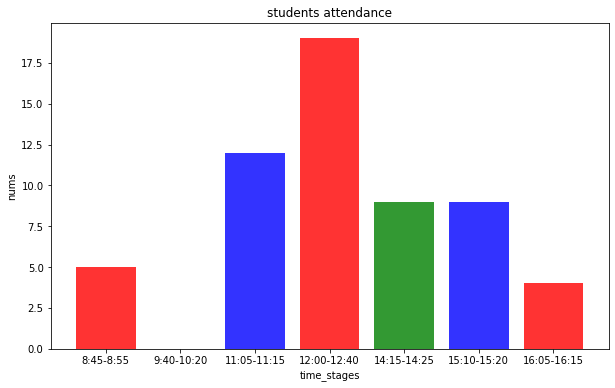

In [5]:
# 绘图
time_count = get_data(myDataList)
rd = ['8:45-8:55','9:40-10:20','11:05-11:15','12:00-12:40','14:15-14:25','15:10-15:20','16:05-16:15']
plt.bar(x=rd, height=time_count, color=['r','g','b'], alpha=0.8)
# 设置标题
plt.title("students attendance")
# 为两条坐标轴设置名称
plt.xlabel("time_stages")
plt.ylabel("nums")
plt.rcParams['figure.figsize']=(12,6)
#plt.legend()
plt.show()

# 2、画12月21号到25号的折线图

In [6]:
files = ["2020-12-21.csv","2020-12-22.csv","2020-12-23.csv","2020-12-24.csv","2020-12-25.csv"]
files_data=[]
for name in files:
    f = open(name,'r+',encoding='utf-8')
    data_list = f.readlines()
    files_data.append(get_data(data_list))

In [7]:
#这里是用来显示x轴坐标的序号的
rd = []
num = 1
for i in files_data[0]:
    rd.append(num)
    num += 1

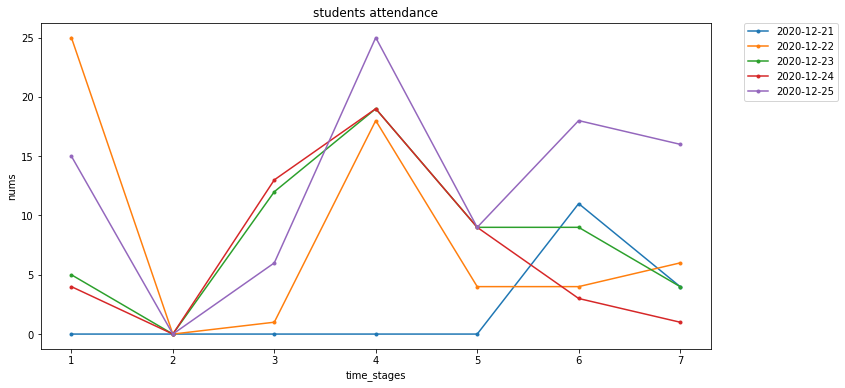

In [8]:
import numpy as np
# 生成图形

plt.plot(rd, files_data[0], '.-', label='2020-12-21')
plt.plot(rd, files_data[1], '.-', label='2020-12-22')
plt.plot(rd, files_data[2], '.-', label='2020-12-23')
plt.plot(rd, files_data[3], '.-', label='2020-12-24')
plt.plot(rd, files_data[4], '.-', label='2020-12-25')
plt.ylabel('nums') # 横坐标轴的标题
plt.xlabel('time_stages') # 纵坐标轴的标题
plt.title('students attendance') # 图形的标题
#plt.legend() # 显示图例，即每条线对应 label 中的内容
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
# 显示图形
plt.show()